**This is the code for the machine learning model**

In order to use this code, your data must be saved as **"TotalTrafo.csv"** in the same folder as this code

In [13]:
#import neccessary tools and the csv file "TotalTrafo"
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
import numpy as np
%matplotlib inline
data = pd.read_csv("TotalTrafo.csv")

In [14]:
#Look at the data and shape it, so the right format is used and it can be seperated
dir(data)
type(data.Trafo_Total)

pandas.core.series.Series

In [15]:
# Seperate the data in the target values (Energy usage of Trafo1 and Trafo2) and the features, check if everything is correct
Y = data['Trafo_Total']

#cyclic decoding of the hours (0-23) to sin and cosine values
data['hour_sin'] = np.sin(2 * np.pi * data['Hour']/23.0)
data['hour_cos'] = np.cos(2 * np.pi * data['Hour']/23.0)

X = data.drop(['Trafo1', 'Trafo2', 'datetime', 'Trafo_Total', 'Month', 'Day', 'Hour'],axis=1)

#check the format and the shape of the data again
print(X)
#print(Y)

      Workday  Min_Temp  Max_Temp  Feels_Like  Pressure  Humidity  Wind Speed  \
0           1     -4.70       2.2       -5.23      1012        97        1.18   
1           1     -5.20       2.7       -4.92      1012        94        1.00   
2           1     -5.70       2.0       -5.48      1012        92        1.00   
3           1     -5.00       1.7       -5.10      1012        93        0.52   
4           1     -4.64       0.0       -5.64      1012        93        1.00   
...       ...       ...       ...         ...       ...       ...         ...   
8755        1     -2.30       8.4       -1.54      1016        41        4.00   
8756        1     -3.00       7.8       -3.70      1017        48        6.00   
8757        1     -2.20       7.1       -0.42      1018        60        2.00   
8758        1     -2.30       6.9       -1.94      1019        53        3.34   
8759        1     -2.50       6.9       -2.17      1020        53        2.98   

          hour_sin  hour_co

In [16]:
data.Trafo_Total.shape

(8760,)

In [17]:
data['Trafo_Total']

0       47.17
1       48.64
2       48.58
3       46.85
4       48.45
        ...  
8755    76.42
8756    63.23
8757    53.12
8758    58.75
8759    46.59
Name: Trafo_Total, Length: 8760, dtype: float64

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeClassifier()

In [20]:
#regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
#regr_1.fit(X_train, Y_train)
regr_2.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=5)

In [21]:
predictions = regr_2.predict(X_test)
len(predictions)

1752

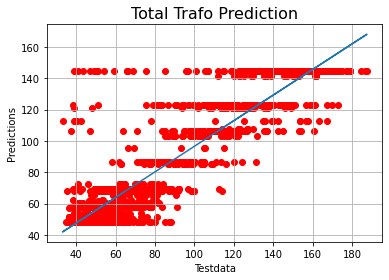

In [22]:
#plot the predictions vs, the testdata in a scatterplot with grid
plt.scatter(Y_test, predictions, color='red')
plt.title('Total Trafo Prediction', fontname='sans-serif', fontsize=16)
plt.xlabel("Testdata")
plt.ylabel("Predictions")
plt.grid(True)

#add a linear polynomial fit line to the plot
from numpy.polynomial.polynomial import polyfit
b, m = polyfit(Y_test, predictions, 1)
plt.plot(Y_test, b + m * Y_test, '-')

In [23]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
MAE = r2_score(Y_test, predictions)
RMSE = np.sqrt(mean_squared_error(Y_test, predictions))
RMSE = round(RMSE, 2)
MAE = round(MAE, 4)

In [24]:
txt1 = "The R2 score is {MAE}".format(MAE = MAE)
txt2 = "With this model we can predict the energy consumption on a specific day within the range of \033[1m {RMSE} kW".format(RMSE = RMSE)

print(txt1)
print(txt2)

The R2 score is 0.8125
With this model we can predict the energy consumption on a specific day within the range of  16.51 kW


**Comparison of Trafo1 + Trafo2 with TotalTrafo prediction data**

Trafo1

In [25]:
#import neccessary tools and the csv file "TotalTrafo.csv"
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
import numpy as np
%matplotlib inline
data1 = pd.read_csv("TotalTrafo.csv")

#Look at the data and shape it, so the right format is used and it can be seperated
dir(data1)
type(data1.Trafo1)

# Seperate the data in the target values (Energy usage of Trafo1 and Trafo2) and the features, check if everything is correct
B = data1['Trafo1']

#cyclic decoding of the hours (0-23) to sin and cosine values
data['hour_sin'] = np.sin(2 * np.pi * data['Hour']/23.0)
data['hour_cos'] = np.cos(2 * np.pi * data['Hour']/23.0)

A = data.drop(['Trafo1', 'datetime', 'Trafo_Total', 'Month', 'Day', 'Hour'],axis=1)

data1.Trafo1.shape
data1['Trafo1']

from sklearn.model_selection import train_test_split
A_train, A_test, B_train, B_test = train_test_split(A, B, test_size = 0.2, random_state = 42)

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeClassifier()

regr_2 = DecisionTreeRegressor(max_depth=5)
regr_2.fit(A_train, B_train)

predictions1 = regr_2.predict(A_test)
len(predictions1)


from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
MAE1 = r2_score(B_test, predictions1)
RMSE1 = np.sqrt(mean_squared_error(B_test, predictions1))
RMSE1 = round(RMSE1, 2)
MAE1 = round(MAE1, 4)

print(predictions1)

[52.64546875 71.06791822 77.65072327 ... 29.61696552 53.51782946
 33.23356164]


Trafo 2

In [26]:
%matplotlib inline
data2 = pd.read_csv("TotalTrafo.csv")

#Look at the data and shape it, so the right format is used and it can be seperated
dir(data2)
type(data2.Trafo2)

# Seperate the data in the target values (Energy usage of Trafo1 and Trafo2) and the features, check if everything is correct
D = data2['Trafo2']

#cyclic decoding of the hours (0-23) to sin and cosine values
data['hour_sin'] = np.sin(2 * np.pi * data['Hour']/23.0)
data['hour_cos'] = np.cos(2 * np.pi * data['Hour']/23.0)

C = data.drop(['Trafo2', 'datetime', 'Trafo_Total', 'Month', 'Day', 'Hour'],axis=1)

data2.Trafo2.shape
data2['Trafo2']

from sklearn.model_selection import train_test_split
C_train, C_test, D_train, D_test = train_test_split(C, D, test_size = 0.2, random_state = 42)


from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeClassifier()

regr_2 = DecisionTreeRegressor(max_depth=5)
regr_2.fit(C_train, D_train)

predictions2 = regr_2.predict(C_test)
len(predictions2)


from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
MAE2 = r2_score(D_test, predictions2)
RMSE2 = np.sqrt(mean_squared_error(D_test, predictions2))
RMSE2 = round(RMSE2, 2)
MAE2 = round(MAE2, 4)

print(predictions2)

[58.69721408 75.01194631 75.01194631 ... 16.3242019  36.69943836
 16.3242019 ]


In [27]:
trafo12 = predictions1 + predictions2
print(trafo12)

[111.34268283 146.07986452 152.66266958 ...  45.94116742  90.21726781
  49.55776354]


In [28]:
artx = list(range(1, 1753))

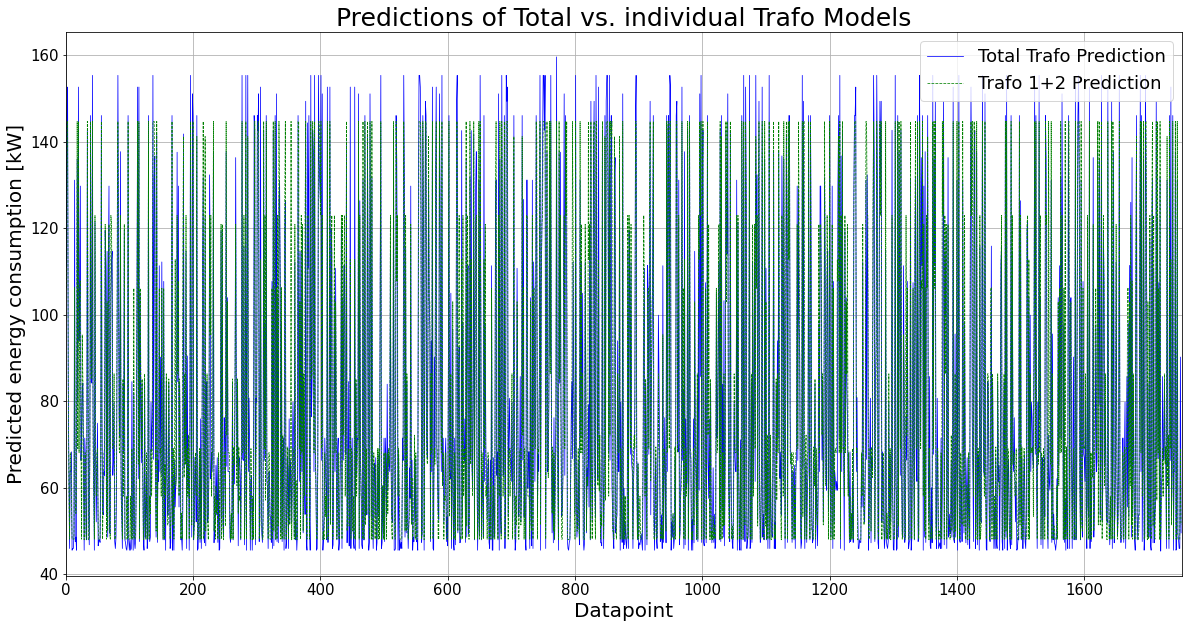

In [29]:
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)

fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xlim(0, 1753)
ax.plot(artx, trafo12, '-b', linewidth=0.75, label='Total Trafo Prediction')
ax.plot(artx, predictions, '--g', linewidth=0.75, label='Trafo 1+2 Prediction')
leg = ax.legend(fontsize=18)

plt.title('Predictions of Total vs. individual Trafo Models', fontname='sans-serif', fontsize=25)
plt.xlabel("Datapoint", fontsize=20)
plt.ylabel("Predicted energy consumption [kW]", fontsize=20)
plt.grid(True)


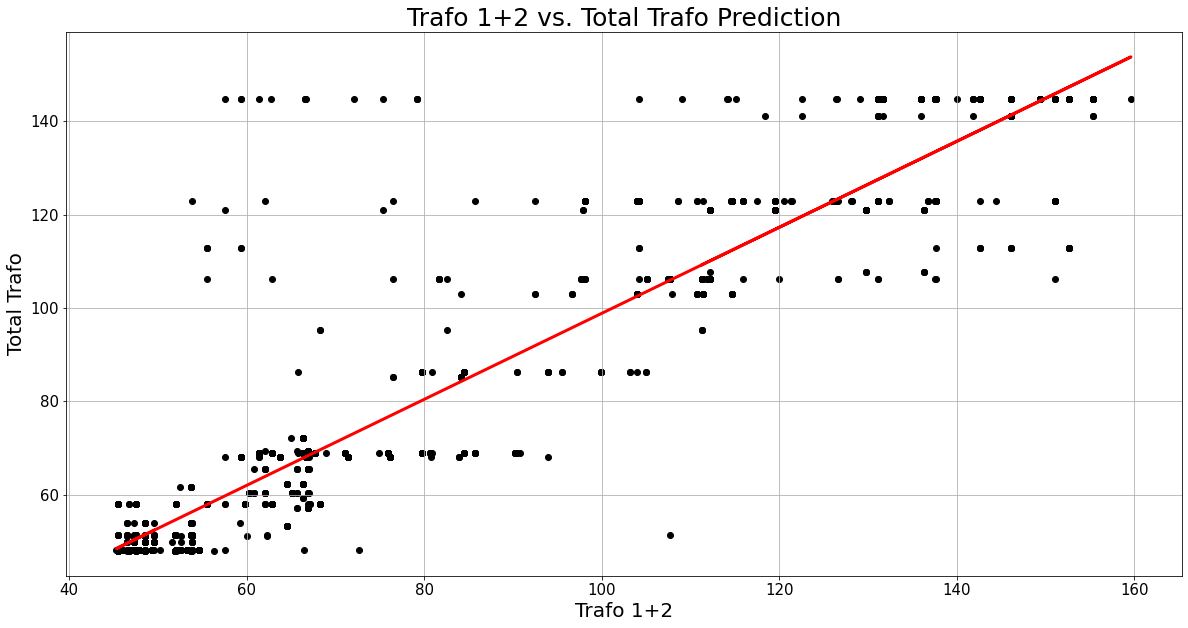

In [30]:
plt.figure(figsize=(20,10))
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)
plt.scatter(trafo12, predictions, color='black')
plt.title('Trafo 1+2 vs. Total Trafo Prediction', fontname='sans-serif', fontsize=25)
plt.xlabel("Trafo 1+2", fontsize=20)
plt.ylabel("Total Trafo", fontsize=20)
plt.grid(True)

#add a linear polynomial fit line to the plot
c, n = polyfit(trafo12, predictions, 1)
plt.plot(trafo12, c + n * trafo12, '-', color='red', linewidth=3)

In [31]:
MAE3 = r2_score(trafo12, predictions)
RMSE3 = np.sqrt(mean_squared_error(trafo12, predictions))
RMSE3 = round(RMSE3, 2)
MAE3 = round(MAE3, 4)

txt3 = "The R2 score is {MAE3}".format(MAE3 = MAE3)
txt4 = "The RMSE of the two different models is \033[1m {RMSE3} kW".format(RMSE3 = RMSE3)

print(txt3)
print(txt4)

The R2 score is 0.8886
The RMSE of the two different models is  11.84 kW


**Trying to compare only the 2 Trafo models**

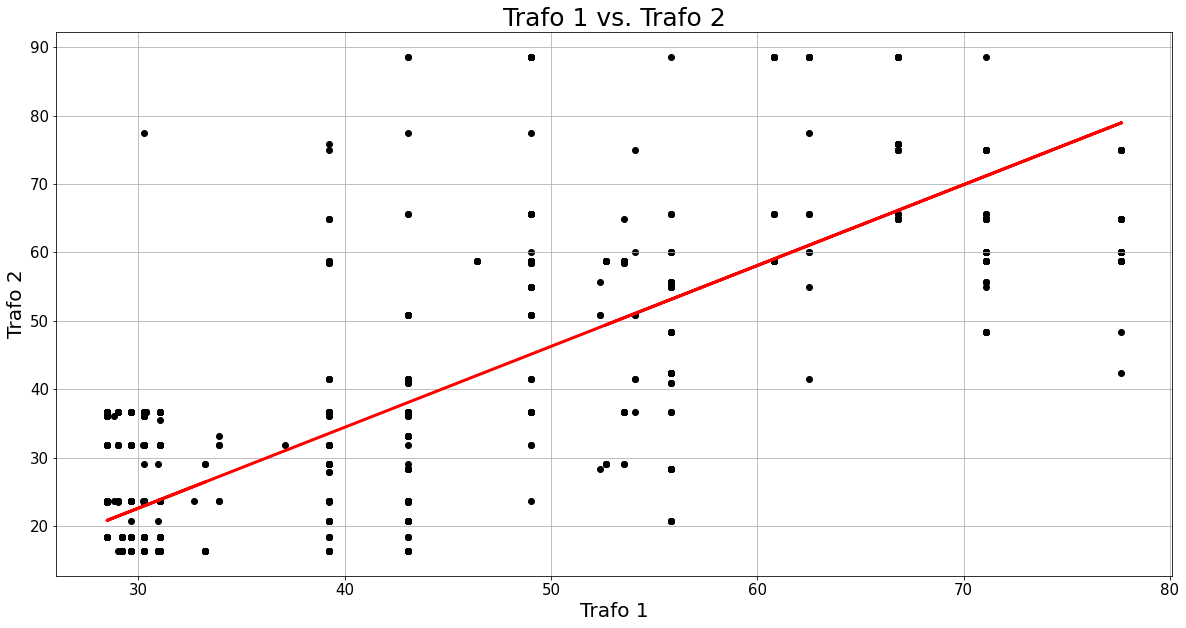

In [32]:
plt.figure(figsize=(20,10))
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)
plt.scatter(predictions1, predictions2, color='black')
plt.title('Trafo 1 vs. Trafo 2', fontname='sans-serif', fontsize=25)
plt.xlabel("Trafo 1", fontsize=20)
plt.ylabel("Trafo 2", fontsize=20)
plt.grid(True)

#add a linear polynomial fit line to the plot
d, o = polyfit(predictions1, predictions2, 1)
plt.plot(predictions1, d + o * predictions1, '-', color='red', linewidth=3)

In [33]:
MAE4 = r2_score(predictions1, predictions2)
RMSE4 = np.sqrt(mean_squared_error(predictions1, predictions2))
RMSE4 = round(RMSE4, 2)
MAE4 = round(MAE4, 4)

txt5 = "The R2 score is {MAE4}".format(MAE4 = MAE4)
txt6 = "The RMSE of the two different models is \033[1m {RMSE4} kW".format(RMSE4 = RMSE4)

print(txt5)
print(txt6)

The R2 score is 0.1846
The RMSE of the two different models is  13.75 kW
